In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from joblib import load
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled = load('../../analysis and preprocessing/classification_preprocessed.joblib')

In [3]:
def cnf_matrix(y_pred_test, colormap): 
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, 
                                        display_labels=[False, True])
    
    cm_display = cm_display.plot(cmap=colormap, values_format='g')


In [4]:
params = {
    'kernel' : ['rbf', 'poly', 'sigmoid'],
    'C' : [1.0, 2.0]
}

In [5]:
ker = SVC(kernel = 'rbf')
grid = GridSearchCV(estimator=ker, 
                    param_grid=params, 
                    cv = 5, 
                    verbose = 8)
grid.fit(X_train_scaled, y_train)
grid.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .................C=1.0, kernel=rbf;, score=0.891 total time=   2.4s
[CV 2/5] END .................C=1.0, kernel=rbf;, score=0.891 total time=   2.2s
[CV 3/5] END .................C=1.0, kernel=rbf;, score=0.885 total time=   2.2s
[CV 4/5] END .................C=1.0, kernel=rbf;, score=0.875 total time=   2.4s
[CV 5/5] END .................C=1.0, kernel=rbf;, score=0.887 total time=   2.6s
[CV 1/5] END ................C=1.0, kernel=poly;, score=0.867 total time=   2.5s
[CV 2/5] END ................C=1.0, kernel=poly;, score=0.866 total time=   2.3s
[CV 3/5] END ................C=1.0, kernel=poly;, score=0.860 total time=   2.4s
[CV 4/5] END ................C=1.0, kernel=poly;, score=0.864 total time=   3.3s
[CV 5/5] END ................C=1.0, kernel=poly;, score=0.870 total time=   3.6s
[CV 1/5] END .............C=1.0, kernel=sigmoid;, score=0.885 total time=   3.6s
[CV 2/5] END .............C=1.0, kernel=sigmoid;,

{'C': 2.0, 'kernel': 'rbf'}

In [6]:
svm_kernel = SVC(kernel = 'rbf', C = 2.0)
svm_kernel.fit(X_train_scaled, y_train)

SVC(C=2.0)

Train result: 0.9155452436194895
Test result: 0.8820027063599458

               precision    recall  f1-score   support

           0       0.89      0.98      0.93      3123
           1       0.75      0.36      0.49       572

    accuracy                           0.88      3695
   macro avg       0.82      0.67      0.71      3695
weighted avg       0.87      0.88      0.86      3695



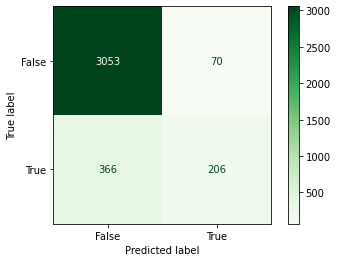

In [7]:
y_pred_train = svm_kernel.predict(X_train_scaled)
y_pred_test = svm_kernel.predict(X_test_scaled)
    
train_result = accuracy_score(y_train, y_pred_train)
print("Train result:", train_result)
test_result = accuracy_score(y_test, y_pred_test)
print("Test result:", test_result)
print("\n", classification_report(y_test, y_pred_test))

cnf_matrix(y_pred_test, plt.cm.Greens)

### Sada sa balansiranjem klasa

In [8]:
oversample = SMOTE(random_state = 2, sampling_strategy = 'minority')
X_train_smote, y_train = oversample.fit_resample(X_train_scaled, y_train.ravel())

In [9]:
params_smt = {
    'kernel' : ['rbf', 'poly', 'sigmoid'],
    'C' : [1.0, 2.0]
}

In [10]:
ker_smt = SVC(kernel = 'rbf')
grid_smt = GridSearchCV(estimator=ker_smt, 
                        param_grid=params_smt, 
                        cv = 5, 
                        verbose = 8)
grid_smt.fit(X_train_smote, y_train)
grid_smt.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .................C=1.0, kernel=rbf;, score=0.869 total time=   8.2s
[CV 2/5] END .................C=1.0, kernel=rbf;, score=0.917 total time=   8.9s
[CV 3/5] END .................C=1.0, kernel=rbf;, score=0.915 total time=   8.8s
[CV 4/5] END .................C=1.0, kernel=rbf;, score=0.908 total time=   9.1s
[CV 5/5] END .................C=1.0, kernel=rbf;, score=0.923 total time=   8.4s
[CV 1/5] END ................C=1.0, kernel=poly;, score=0.859 total time=   9.1s
[CV 2/5] END ................C=1.0, kernel=poly;, score=0.884 total time=   9.9s
[CV 3/5] END ................C=1.0, kernel=poly;, score=0.879 total time=  10.1s
[CV 4/5] END ................C=1.0, kernel=poly;, score=0.876 total time=   9.9s
[CV 5/5] END ................C=1.0, kernel=poly;, score=0.893 total time=  10.0s
[CV 1/5] END .............C=1.0, kernel=sigmoid;, score=0.772 total time=   6.5s
[CV 2/5] END .............C=1.0, kernel=sigmoid;,

{'C': 2.0, 'kernel': 'rbf'}

In [11]:
svm_kernel_smt = SVC(kernel = 'rbf', C = 2.0)
svm_kernel_smt.fit(X_train_smote, y_train)

SVC(C=2.0)

Train result: 0.9398847104035136
Test result: 0.8611637347767253

               precision    recall  f1-score   support

           0       0.93      0.91      0.92      3123
           1       0.55      0.60      0.57       572

    accuracy                           0.86      3695
   macro avg       0.74      0.75      0.74      3695
weighted avg       0.87      0.86      0.86      3695



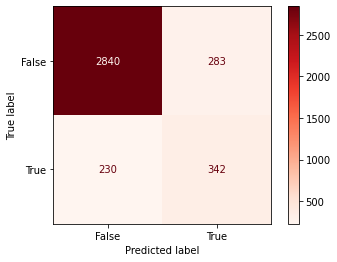

In [12]:
y_pred_train_smt = svm_kernel_smt.predict(X_train_smote)
y_pred_test_smt = svm_kernel_smt.predict(X_test_scaled)
    
train_result_smt = accuracy_score(y_train, y_pred_train_smt)
print("Train result:", train_result_smt)
test_result_smt = accuracy_score(y_test, y_pred_test_smt)
print("Test result:", test_result_smt)
print("\n", classification_report(y_test, y_pred_test_smt))

cnf_matrix(y_pred_test_smt, plt.cm.Reds)

In [13]:
fpr_svm_ker, tpr_svm_ker, threshold_svm_ker = roc_curve(y_test, y_pred_test)
roc_auc_svm_ker = auc(fpr_svm_ker, tpr_svm_ker)

In [14]:
fpr_svm_ker_smt, tpr_svm_ker_smt, threshold_svm_ker_smt = roc_curve(y_test, y_pred_test_smt)
roc_auc_svm_ker_smt = auc(fpr_svm_ker_smt, tpr_svm_ker_smt)

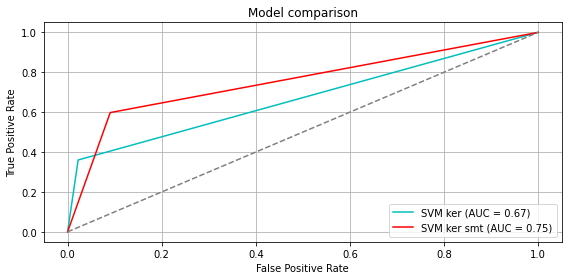

In [15]:
fig = plt.figure(figsize=(8, 4))

plt.plot(fpr_svm_ker, tpr_svm_ker, color='c', label = 'SVM ker (AUC = %0.2f)' % roc_auc_svm_ker)
plt.plot(fpr_svm_ker_smt, tpr_svm_ker_smt, color='r', label = 'SVM ker smt (AUC = %0.2f)' % roc_auc_svm_ker_smt)

plt.grid()
plt.title("Model comparison")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.tight_layout()
plt.show()

In [16]:
%store fpr_svm_ker
%store tpr_svm_ker
%store threshold_svm_ker
%store roc_auc_svm_ker

Stored 'fpr_svm_ker' (ndarray)
Stored 'tpr_svm_ker' (ndarray)
Stored 'threshold_svm_ker' (ndarray)
Stored 'roc_auc_svm_ker' (float64)


In [17]:
%store fpr_svm_ker_smt
%store tpr_svm_ker_smt
%store threshold_svm_ker_smt
%store roc_auc_svm_ker_smt

Stored 'fpr_svm_ker_smt' (ndarray)
Stored 'tpr_svm_ker_smt' (ndarray)
Stored 'threshold_svm_ker_smt' (ndarray)
Stored 'roc_auc_svm_ker_smt' (float64)
